# Interactive DataVisualization Using Python and Bokeh
dataset : https://www.kaggle.com/START-UMD/gtd/kernels

Module: Data Visualization

Assignment 2

MSc. Data Analytics

Dublin Business School

In [1]:
import numpy as np
import pandas as pd
from bokeh.io import show, output_file
from bokeh.plotting import figure
import matplotlib.pyplot as plt
%matplotlib inline

Read dataset

In [2]:
df_gtd = pd.read_csv("gtd.csv",encoding='ISO-8859-1') 
df_gtd.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(181691, 135)

In [3]:
df_gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Get columnnames

In [4]:
columns =df_gtd.columns
columns
names =[ x for x in columns]
print (names)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [3]:
df_gtd.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

# copy only necessary attributes

In [4]:
#removing unnecessary columns and creating new column
df_gtd=df_gtd[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df_gtd['casualities']=df_gtd['Killed']+df_gtd['Wounded']


In [7]:
df_gtd.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


# Death, Wounded and Casualties by Region 
Casualties are calculated as sum of both death toll and wounded counts. ALl three plots are connected to each other and effect of interaction on any plot will be reflected to remaining plots. This work os achieved by availing Bokeh library.

In [5]:

#df_death = df_gtd.groupby(by=["Country",'Region']).sum()
df_region_wise = df_gtd[['Region','Killed','Wounded','casualities']].copy()
df_region_wise = df_region_wise.groupby(by=['Region']).sum()
df_region_wise

,Killed,Wounded,casualities
Region,,,
Australasia & Oceania,150.0,260.0,409.0
Central America & Caribbean,28708.0,8991.0,34530.0
Central Asia,1000.0,2009.0,2969.0
East Asia,1152.0,9213.0,10003.0
Eastern Europe,7415.0,12045.0,18239.0
Middle East & North Africa,137642.0,214308.0,329807.0
North America,4916.0,21531.0,26398.0
South America,28849.0,16704.0,43562.0
South Asia,101319.0,141360.0,234366.0


In [6]:
from bokeh.sampledata.autompg import autompg
from bokeh.models import NumeralTickFormatter
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from math import pi
from bokeh.io import output_notebook
from bokeh.io import export_png
from bokeh.io import curdoc, output_notebook
from bokeh.models import HoverTool
#from bokeh.layouts import widgetbox, row, column
from bokeh.palettes import brewer
from bokeh.models import FixedTicker,NumeralTickFormatter

output_notebook()


Loading BokehJS ...

In [7]:
def set_stype(figure,  xlabel="", ylabel=""):
    #figure.title = 
    figure.title.align ='center'
    
    figure.xaxis.axis_label=xlabel
    figure.yaxis.axis_label =ylabel
    figure.xaxis.axis_label_text_font="times"
    
    figure.yaxis.axis_label_text_font="times"
    figure.xaxis.axis_label_text_font_style ="bold"
    figure.yaxis.axis_label_text_font_style ="bold"
    
    figure.title.text_font = "times"
    figure.title.text_font_style = "bold"

    
    

In [8]:

source = ColumnDataSource(df_region_wise)
print(df_region_wise.columns)
options = dict(plot_width=450, plot_height=450,
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select")
#plot for death toll
p1 = figure(x_range= df_region_wise.index.tolist(), title="Death By Region", **options )
p1.vbar(x= 'Region', top= 'Killed' , width=5,  fill_alpha=1,source=source) #, legend="MPG 1 stddev")
p1.xaxis.major_label_orientation = pi/2
p1.x_range.factor_padding = 5
p1.yaxis.formatter=NumeralTickFormatter(format="00")
set_stype(p1,  xlabel="Region", ylabel ="Killed")

p2 = figure(x_range= df_region_wise.index.tolist(),title="Wounded By Regions", **options)
p2.vbar(x= 'Region', top='Wounded' , width=5, fill_alpha=1, color='green',source =source)  #, legend="MPG 1 stddev")
p2.xaxis.major_label_orientation = pi/2
p2.x_range.factor_padding = 5
p2.yaxis.formatter=NumeralTickFormatter(format="00")
set_stype(p2,  xlabel="Region", ylabel ="Wounded")


p3 = figure(x_range= df_region_wise.index.tolist(),title="Casualties By Region", **options)
p3.vbar(x= 'Region', top='casualities' , width=5, fill_alpha=1, color='firebrick',source=source) #, legend="MPG 1 stddev")
p3.xaxis.major_label_orientation = pi/2
p3.x_range.factor_padding = 5
p3.yaxis.formatter=NumeralTickFormatter(format="00")
set_stype(p3,  xlabel="Region", ylabel ="Casualities")


p = gridplot([[ p1, p2, p3]], toolbar_location="right")


show(p)
export_png(p, filename="./death_wounded_casualties_by_Region.png")

Index(['Killed', 'Wounded', 'casualities'], dtype='object')


'C:\\Users\\Swapnil\\Documents\\ML jermey Hardward\\interactive data visualization global terrorism\\death_wounded_casualties_by_Region.png'

# Attack counts By regions and  year. 
WSe can observe that all regions are categorized by 12 Different regions as shown in the map. COunt attacks are displayed against the regions. By and large the highets attack counts are observed in "North Africa and Middle East" region that is more than 7000. Followed by South Asia region at the second rank. overall, it is good to know that  minimum terror attacks are observed in North and SOuth America Continents.  

In [9]:
#get number of attacks by years and regions

df_trend = df_gtd.groupby(['Region','Year']).size().reset_index().rename(columns={0:'count'})

regions =df_trend.Region.unique() 
regions

years= df_trend.Year.unique()
years

df_trend.head()

,Region,Year,count
0,Australasia & Oceania,1970,1
1,Australasia & Oceania,1971,1
2,Australasia & Oceania,1972,8
3,Australasia & Oceania,1973,1
4,Australasia & Oceania,1974,1


In [10]:
from bokeh.plotting import figure, output_file, show
# select a palette
from bokeh.palettes import Category20 as palette
# itertools handles the cycling
import itertools  
import random
from random import randint
#output_file("patch.html")

p = figure(plot_width=800, plot_height=800, title ='Attack Counts By Region')
#colors = colorsk(len(regions))#list(np.random.choice(range(256), size=len(regions)))

colors = ['#440154', '#404387', '#29788E', '#22A784', '#79D151', '#FD0724','#37AB65', '#7C60A8', '#CF95D7', '#F6CC1D','#3DF735', '#AD6D70']
color_id =0
for reg in regions:
    
    years = df_trend.loc[df_trend.Region == reg ,'Year']
    counts = df_trend.loc[df_trend.Region == reg ,'count']
    p.line( years,counts ,color= colors[color_id] , alpha=0.8, line_width=4,legend=reg ) 
    
    color_id = color_id + 1

p.legend.location = "top_left"
p.legend.click_policy="hide"
#set_stype(p3,  xlabel="Region", ylabel ="Casualities")

set_stype(p,  xlabel="Year", ylabel ="Attack Counts")
export_png(p, filename="./Attack Counts By Region.png")
show(p)



# Working with Geopandas , Shapefile, Maps. 
First we load shape file of the world map which contains country names, country codes and their location. 

In [11]:
#creating geopanda dataframe from shape file
import geopandas as gpd
shapefile = 'ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['Country', 'country_code', 'geometry']
#sorting dataframe 
gdf.sort_values(by=['Country'], inplace=True)
#reseting index
gdf.reset_index(drop=True, inplace=True)
#print(np.array(gdf.Country))

Preparing dataframe to get casualties and country detail

In [12]:
#creating new dataframe for choropleth
df= df_gtd[['Country', 'Killed', 'Wounded' ]].groupby(by="Country").sum()
df.reset_index(inplace=True)
df['Casulties'] = df.Killed + df.Wounded  
#sorting by country name
df.sort_values(by=['Country'],  inplace=True)
#reset index
df.reset_index(drop=True, inplace=True)
#print(np.array(df.Country))

The countrie names in the shape file must mach with the same in our dataframe. For example  country name "Republic of Ireland" 
is "Ireland" in df_gtd dataframe. To locate county and data on map it is vital to have same country names in geopanda dataframe 
and excel derived dataframe. The following code is to change our country names in df_gtd to be same as shapefile country names.
In other words after the process both data frame(gtd and geopanda-gdf) will have same name-'Republic of Ireland'.

In [13]:
#country names in shape file dataframe(gdf) and csv dataframe df must match to show countries on map choropleth  
def get_countries_with_space(df):
    #returns -1 whnen character is not found
    #getting indexes of name containing spaces
    result_df= np.core.defchararray.find(df.astype(str), ' ')
    #print(result_df)
    indexes = np.where(result_df != -1)
    #print(indexes)
    return indexes,df[indexes]


df_countries= np.array(df.Country)

index_df, countries_df = get_countries_with_space(df_countries)
#print(countries_df)


#preparing array of countries to changenames
replacement_df= ['Antigua and Barbuda', 'Burkina Faso', 'Central African Republic',
 'Costa Rica', 'Czechia', 'Republic of the Congo',
 'Dominican Republic', 'Germany' ,'East Timor' ,'El Salvador',
 'Equatorial Guinea' ,'Falkland Islands' ,'Guyana', 'French Polynesia',
 'Hong Kong', 'Ivory Coast', 'New Caledonia', 'New Hebrides', 'New Zealand',
 'North Korea', 'Yemen', 'Papua New Guinea',
 "Democratic Republic of the Congo", 'Republic of the Congo', 'Saudi Arabia',
 'Sierra Leone', 'Slovak Republic', 'Solomon Islands', 'South Africa',
 'South Korea', 'South Sudan', 'Vietnam', 'Yemen', 'Russia',
 'Sri Lanka', 'St. Kitts and Nevis', 'St. Lucia', 'Trinidad and Tobago',
 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Vatican City',
 'Wallis and Futuna', 'West Bank and Gaza Strip', 'Germany','Western Sahara']

#print("replacement indexes: ", index_df)

df_countries[index_df] = replacement_df

df.Country= df_countries
#countries names in shape file
# 'Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antarctica' 'Argentina'
#  'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus'
#  'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
#  'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
#  'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
#  'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
#  'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
#  'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
#  'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Falkland Islands'
#  'Fiji' 'Finland' 'France' 'French Southern and Antarctic Lands' 'Gabon'
#  'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Guatemala'
#  'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland'
#  'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
#  'Ivory Coast' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo'
#  'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
#  'Libya' 'Lithuania' 'Luxembourg' 'Macedonia' 'Madagascar' 'Malawi'
#  'Malaysia' 'Mali' 'Mauritania' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro'
#  'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Netherlands'
#  'New Caledonia' 'New Zealand' 'Nicaragua' 'Niger' 'Nigeria' 'North Korea'
#  'Northern Cyprus' 'Norway' 'Oman' 'Pakistan' 'Palestine' 'Panama'
#  'Papua New Guinea' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
#  'Puerto Rico' 'Qatar' 'Republic of Serbia' 'Republic of the Congo'
#  'Romania' 'Russia' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Sierra Leone'


#  'Slovakia' 'Slovenia' 'Solomon Islands' 'Somalia' 'Somaliland'
#  'South Africa' 'South Korea' 'South Sudan' 'Spain' 'Sri Lanka' 'Sudan'
#  'Suriname' 'Sweden' 'Switzerland' 'Syria' 'Taiwan' 'Tajikistan'
#  'Thailand' 'The Bahamas' 'Togo' 'Trinidad and Tobago' 'Tunisia' 'Turkey'
#  'Turkmenistan' 'Uganda' 'Ukraine' 'United Arab Emirates' 'United Kingdom'
#  'United Republic of Tanzania' 'United States of America' 'Uruguay'
#  'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam' 'Western Sahara' 'Yemen'
#  'Zambia' 'Zimbabwe' 'eSwatini'


In [14]:
#checking for gdf countrinames to match with df countries names


gdf_countries = np.array(gdf.Country)
df_countries = np.array(df.Country)

#getting nonnmatching values from gdf 
nonmached_gdf=[]
for i in gdf_countries:
    if i not in df_countries:
        nonmached_gdf.append(i)



#print(nonmached_gdf)


#getting nonnmatching values from df
nonmached_df=[]
indexes = []
count=0
for i in df_countries:
    if i not in gdf_countries:
        nonmached_df.append(i)
        indexes.append(count)
    count = count +1    

replacement= ['Andorra', 'Antigua and Barbuda', 'The Bahamas', 'Bahrain', 'Barbados', 'Bosnia and Herzegovina', 'Comoros', 'Czechia', 
              'Dominica', 'French Polynesia', 'Grenada', 'Guadeloupe', 'Hong Kong', 'International', 'Macau', 'Maldives', 'Malta', 
              'Martinique', 'Mauritius', 'New Hebrides', 'Rhodesia', 'Republic of Serbia', 'Republic of Serbia', 'Seychelles', 'Singapore', 
              'Slovakia', 'St. Kitts and Nevis', 'St. Lucia','Swaziland', 'United Republic of Tanzania', 'Vatican City', 'Wallis and Futuna',
              'West Bank and Gaza Strip', 'Yugoslavia', 'Zaire']

#replacing non matching values 
df_countries[indexes] = replacement
#replacing dataframe
df.Country = df_countries

#here we have replaced all countries names in dataframe which is now matching with shape file names



Finally all contry names in both dataframe are same now. But still there can be country duplicate records. Lets resolve it.

In [15]:
# summing duplicate countries
df= df.groupby(by='Country').sum()
df.reset_index(inplace= True)
df.loc[df.Country == 'Russia']

,Country,Killed,Wounded,Casulties
142,Russia,4404.0,7591.0,11995.0


In [16]:
#merging both the dataframme with common column country
merged_df = gdf.merge(df, left_on = 'Country', right_on = 'Country',  how = 'left')
merged_df= merged_df.sort_values(by='Casulties', ascending= False )
merged_df.dropna( inplace = True)
merged_df.head()


,Country,country_code,geometry,Killed,Wounded,Casulties
72,Iraq,IRQ,"POLYGON ((39.19546837744497 32.16100881604267,...",78589.0,134690.0,213279.0
0,Afghanistan,AFG,"POLYGON ((66.51860680528867 37.36278432875879,...",39384.0,44277.0,83661.0
118,Pakistan,PAK,"POLYGON ((77.83745079947457 35.49400950778777,...",23822.0,42038.0,65860.0
69,India,IND,"POLYGON ((97.32711388549004 28.26158274994634,...",19341.0,28980.0,48321.0
113,Nigeria,NGA,"POLYGON ((2.691701694356254 6.258817246928629,...",22682.0,10239.0,32921.0


In [17]:
import json
#merged_df= merged_df.loc[merged_df.Casulties>0,]
#Read data to json.
merged_json = json.loads(merged_df.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [18]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)


# Create choropleth

In [19]:

palette = brewer["Spectral"][8]
#palette = palette[::-1]

color_mapper = LinearColorMapper (palette = palette, low=0 ,high=max(merged_df.Casulties))#merged_df.Casulties.max())#LogColorMapper(palette=palette , lo )

#getting the maximum casualties
max_toll = merged_df.Casulties.max()

ticker = FixedTicker(ticks=[0,(max_toll*0.20),(max_toll*0.40),(max_toll*0.60),(max_toll*0.80),
                            (max_toll)])
color_bar = ColorBar(color_mapper=color_mapper,width = 800, height = 20,ticker = ticker, formatter = NumeralTickFormatter(format=","),
border_line_color=None, orientation = 'horizontal', location=(0, 0) )#major_label_overrides = tick_labels)

hover = HoverTool(tooltips = [ ('Country','@Country'),('Casualties', '@Casulties')])
#Create figure object.
p = figure(title = 'Worldwide Casualties', plot_height = 600 , plot_width = 950, 
           tools = [hover,"pan,wheel_zoom,box_zoom,reset" ], 
           toolbar_location = "right")

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Casulties', 'transform' : color_mapper},
          line_color = 'white', line_width = 1, fill_alpha = 0.7)
#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
#output_notebook()
#Display figure.
set_stype(p)

show(p)
export_png(p, filename="./worldwide_attack_map.png")

'C:\\Users\\Swapnil\\Documents\\ML jermey Hardward\\interactive data visualization global terrorism\\worldwide_attack_map.png'

# Add targeted cities on map 

In [20]:
#Pointing to observed terror attack location / city on maps
#getting latitude and longitudes for markers
df= df_gtd.copy()
df=df.dropna()
df.drop_duplicates(['city'], inplace=True)
source_city = ColumnDataSource(
    data=dict(lat=np.array(df.latitude),
              lon=np.array(df.longitude))
             
)
p.circle(x="lon", y="lat", size=3, fill_color="red", source=source_city)
set_stype(p)
export_png(p, filename="./worldwide_casualties_targed_location.png")
show(p)

# Find 100 most terror attacks Targeted cities in history  

In [22]:
import folium 
from folium import plugins
from folium.plugins import HeatMap

df= df_gtd.city.value_counts()
#print(df)
#remove row with unknwon index
df.drop(axis=1, index='Unknown', inplace=True)
#convert index to column
df =df.reset_index()
df.rename(columns={'index':'city','city':'attackcount'}, inplace= True)
df.sort_values(by=['attackcount'],ascending=False,  inplace= True)
top_target_cities = df.head(100)
top_target_cities

index =0;

#get lat long
df_city = df_gtd[['latitude','longitude','city','Country']]
print(df_city.shape)
df_city.drop_duplicates(inplace= True)
print(df_city.shape)


#merge df

top_100 = top_target_cities.merge(df_city, left_on = 'city', right_on = 'city',  how = 'left')
top_100.drop_duplicates(subset=['city'],inplace=True)
top_100.sort_values(by='attackcount', ascending= False )
top_100.dropna( inplace = True)
top_100.reset_index(inplace=True) #to reset index from 0
top_100.drop(columns=['index'],inplace=True) #remove index deopped column
top_100


# longitude
# df.merge(how="l")
# for city in enumerate(top_target_cities.city):
#     print(i)
    
#rename column 
# df= df_gtd.loc[df_gtd.Country == 'Australia',['latitude', 'longitude','Country','city']].copy()
# df.dropna(inplace=True)




(181691, 4)
(56806, 4)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,city,attackcount,latitude,longitude,Country
0,Baghdad,7589,33.303566,44.371773,Iraq
1,Karachi,2652,24.891115,67.143311,Pakistan
2,Lima,2359,-11.967368,-76.978462,Peru
3,Mosul,2265,36.354145,43.143570,Iraq
4,Belfast,2171,54.607712,-5.956210,United Kingdom
5,Santiago,1621,-33.366238,-70.505302,Chile
6,Mogadishu,1581,2.059819,45.326115,Somalia
7,San Salvador,1558,13.692880,-89.199161,El Salvador
8,Istanbul,1048,41.106178,28.689863,Turkey
9,Athens,1019,37.997490,23.762728,Greece


# Display top 100 Targeted cities in the world

The larger the radius , The higher the attack counts on that city

In [23]:
m = folium.Map(location=[top_100.iloc[0]['latitude'], top_100.iloc[0]['longitude']], tiles="Mapbox Bright", zoom_start=3)

# df =df.reset_index()
# df.drop(columns=['index'], inplace=True)
# df.dropna(inplace= True)
# print(df.shape)

for i in range(0,top_100.shape[0]):
   folium.Circle(
      location=[top_100.iloc[i]['latitude'], top_100.iloc[i]['longitude']],
      
      popup=top_100.iloc[i]['city'],
      radius=(100-i)*(3000-1*50),
      color='steelblue',
      fill=True,
      fill_color='red'
   ).add_to(m)
m

# Attack Counts and Casualties By Year

In [24]:
#get attack by year
from bokeh.palettes import Cividis256
#from bokeh.charts import Area, show
df= df_gtd.copy()
counts = df_gtd.Year.value_counts()
counts.sort_index(ascending=False, inplace=True)

df = df_gtd.groupby(by='Year' ).sum()
df.sort_index(ascending= False, inplace=True)
df['AttackCount'] = counts
df.reset_index(inplace=True)

cols = np.empty(shape=(df.Year.shape)  , dtype="object")



for i in range(0,len(cols)):
    attackCOunts = df.AttackCount.iloc[i]
    year = df.Year.iloc[i]
    color= 'mediumvioletred'
    if (attackCOunts > 10000):
        cols[i] = 'red'
    else:
        cols[i] = 'mediumvioletred'
df['Colors'] = cols

source = ColumnDataSource(df)
hover = HoverTool(tooltips = [ ('Attack Counts','@AttackCount'), ('Year','@Year'), ('Casualities','@casualities')])
options = dict(plot_width=450, plot_height=500,
               tools=["pan,wheel_zoom,box_zoom,box_select,lasso_select", hover])


p = figure(**options, title="Attack Counts by Year" )
p.line( 'Year','AttackCount' ,color= 'mediumvioletred', alpha=0.8, line_width=4, source = source )

p.circle('Year','AttackCount',  size=10, fill_color= 'Colors' , source = source, line_color = 'white')    
set_stype(p,   xlabel="Year", ylabel="Count Attacks")


#hover1 = HoverTool(tooltips = [ ('Casualities','@casualities'), ('Year','@Year')])
p3 = figure(**options, title="Casualties by Year") # 
#p3.line( 'Year','casualities' ,color= 'red', alpha=0.8, line_width=4, source = source )
p3.circle(x='Year',y='casualities',  fill_color= 'Colors' , size=10, source = source, line_color = 'white')    
#p3.vbar(x='Year',top='casualities',  fill_color= 'Colors' , width=2, source = source, line_color = 'white')    
p3.xaxis.major_label_orientation = pi/2
set_stype(p3,  xlabel="Year", ylabel= "Casualties" )

p_grid = gridplot([[ p,  p3]], toolbar_location="right")

show(p_grid)
export_png(p_grid, filename="./attack counts and casualties by year  .png")

df.head()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities,AttackCount,Colors
0,2017,68973,174519,271800.614077,562632.805935,26445.0,24927.0,48208.0,10900,red
1,2016,86313,211833,347519.946882,678154.182005,34871.0,40001.0,69225.0,13587,red
2,2015,94167,235939,398489.570982,753916.190446,38853.0,44043.0,72833.0,14965,red
3,2014,106561,263567,450298.725345,835293.236928,44490.0,41128.0,68853.0,16903,red
4,2013,83877,193930,319946.622256,667008.858111,22273.0,37688.0,57679.0,12036,red


# Top 20 Terror Groups by attack counts 

In [25]:
from bokeh.palettes import OrRd9
from bokeh.models import BoxSelectTool
#count attacks by terrorist groups
counts = df_gtd.Group.value_counts()

#getting top 20 active terror group
counts = counts[1:20]
groups = counts.index
lat = df_gtd.latitude[0:20]
lon = df_gtd.longitude[0:20]
attackcounts = counts.values

source = ColumnDataSource(
    data=dict(
        group=groups,
        attackcounts=attackcounts,
        lat= lat,
        lon= lon,
        color = OrRd9
    )
             )

#creating bar plot
hover = HoverTool(tooltips = [ ('group','@group'), ('attackcounts','@attackcounts')])
p1 = figure(x_range= groups.tolist(),   title="Top 20 Terrorist Groups and attaks ",tools =[hover, 'box_select'])
p1.vbar(x= 'group', top= 'attackcounts' , width=4,  fill_alpha=1, color = 'color', source = source , line_color ="red") 
p1.xaxis.major_label_orientation = pi/2
p1.x_range.factor_padding = 5
p1.yaxis.formatter=NumeralTickFormatter(format="00")
set_stype(p1, xlabel="Terror Group", ylabel="Attack Counts",)

show(p1)
export_png(p1, filename="./Top 20 Terrorist Groups by attaks .png")

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('attackcounts', 19), ('color', 9), ('group', 19), ('lat', 20), ('lon', 20)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


'C:\\Users\\Swapnil\\Documents\\ML jermey Hardward\\interactive data visualization global terrorism\\Top 20 Terrorist Groups by attaks .png'

# Type of Attacks and Counts

In [26]:
#displaying type of attacks
from bokeh.palettes import BuGn9
from bokeh.models import BoxSelectTool
#count attacks by terrorist groups
counts = df_gtd.AttackType.value_counts()



groups = counts.index
AttackTypeCOunts = counts.values

source = ColumnDataSource(
    data=dict(
        group=groups,
        AttackTypeCOunts=AttackTypeCOunts,
        color = BuGn9
    )
             )

#creating bar plot
hover = HoverTool(tooltips = [ ('group','@group'), ('attackcounts','@AttackTypeCOunts')])
p1 = figure(x_range= groups.tolist(), title="Counts of different AttackTypes  ", tools =[hover, 'box_select'], width=800)
p1.vbar(x= 'group', top= 'AttackTypeCOunts' , width=4,  fill_alpha=1, color = 'color', source = source, line_color = 'cyan' ) 
p1.xaxis.major_label_orientation = pi/2
p1.x_range.factor_padding = 5
p1.x_range.range_padding = 0.1
p1.min_border_left=5
p1.yaxis.formatter=NumeralTickFormatter(format="00")



set_stype(p1, xlabel="AttackType", ylabel="Attack Counts")

show(p1)

export_png(p1, filename="./Attack Type and counts .png")


'C:\\Users\\Swapnil\\Documents\\ML jermey Hardward\\interactive data visualization global terrorism\\Attack Type and counts .png'

# To 20 most frequently Weapons Used n Attack

In [27]:
#get weapon details
df= df_gtd.copy()
df.dropna(inplace= True)
df = df.loc[df.Weapon_type != 'Unknown',]
df = df.Weapon_type.value_counts()
df

#displaying type of attacks
from bokeh.palettes import Cividis9
from bokeh.models import BoxSelectTool
#count attacks by terrorist groups
weapons = df.index

#getting top 20 active used weapons

counts = df.values

source = ColumnDataSource(
    data=dict(
        weapons=weapons,
        counts=counts,
        color = Cividis9
    )
             )

#creating bar plot
hover = HoverTool(tooltips = [ ('weapons','@weapons'), ('counts','@counts')])
p1 = figure(x_range= weapons.tolist(), title="Weapons Used in Attacks ", tools =[hover, 'box_select'], width=800, height = 700)
p1.vbar(x= 'weapons', top= 'counts' , width=4,  fill_alpha=1, color = 'color', source = source, line_color = 'cyan' ) 
p1.xaxis.major_label_orientation = pi/2
p1.x_range.factor_padding = 5
p1.x_range.range_padding = 0.1
p1.min_border_left=5
p1.yaxis.formatter=NumeralTickFormatter(format="00")

set_stype(p1, xlabel="Weapons", ylabel="Counts")

show(p1)

export_png(p1, filename="./Counts Weapons in Attacks.png")


C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('color', 9), ('counts', 11), ('weapons', 11)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


'C:\\Users\\Swapnil\\Documents\\ML jermey Hardward\\interactive data visualization global terrorism\\Counts Weapons in Attacks.png'

## Wordclouds


In [127]:

text = df_gtd.Target.dropna()
print(text.isna().sum())
text = " ".join(str(motive) for motive in df_gtd.Motive)
print ("There are {} words in the combination of all review.".format(len(text)))

df_gtd.Target.head()


0
There are 4768123 words in the combination of all review.


0               Julio Guzman
1    Nadine Chaval, daughter
2                   Employee
3               U.S. Embassy
4             U.S. Consulate
Name: Target, dtype: object

In [128]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["say","NaN","specific" ,"carried","incident","responsibility","claimed","noted","United States","minority",
                  "party","Party","noted","attack","motive","source","sources","stated","part","new", "us",
                  "larger","trend","may","target","says","call","unknown","nan","NAN","majority","communities","people"])


# Generate a word cloud image
# wordcloud = WordCloud(stopwords=stopwords, contour_width=3, contour_color='steelblue', max_words=100000000, background_color="white" ).generate(text)

# # Display the generated image:
# # the matplotlib way:
# plt.figure(figsize=[10,10])
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

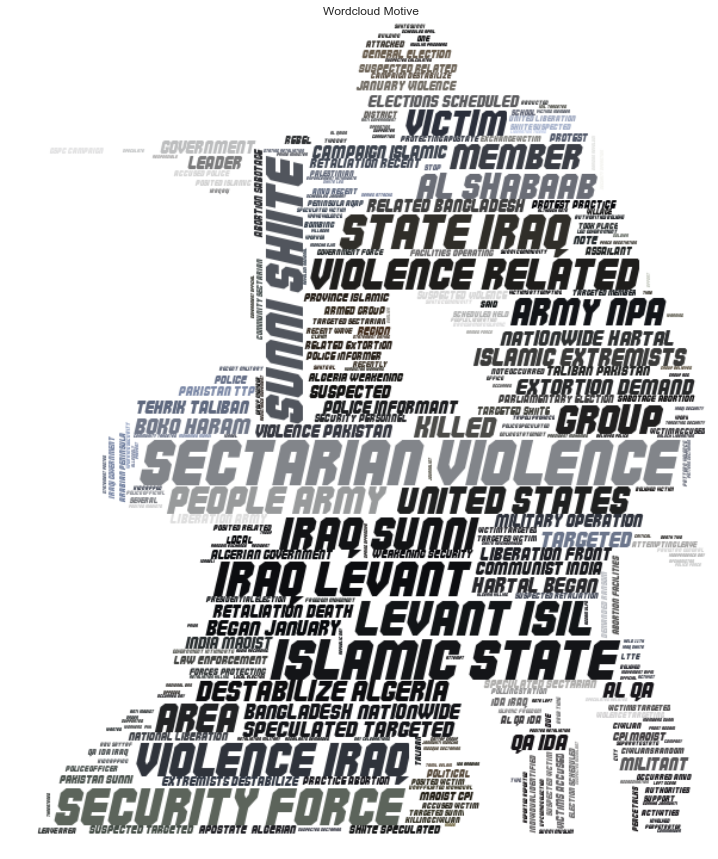

In [131]:
mask = np.array(Image.open("terror.png"))

font='fonts/commando.ttf'
wordcloud_usa = WordCloud(stopwords=stopwords,font_path= font, background_color="white", mode="RGBA", max_words=100000000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Motive")
# store to file 
plt.savefig("motive_word.png", format="png")

plt.show()